# Max Verstappen
<img src="https://www.formula1.com/content/fom-website/en/drivers/max-verstappen/_jcr_content/image.img.1920.medium.jpg/1646819045507.jpg" width="300">

### Team: Red Bull Racing

<img src ="https://www.formula1.com/content/fom-website/en/drivers/max-verstappen/_jcr_content/helmet.img.png/1646824946942.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

ver_laps <- lap_data %>%
            filter(driverId == 830)

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
949,57
1011,57
1045,57
1052,56


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5725787,95.42979,1.590496


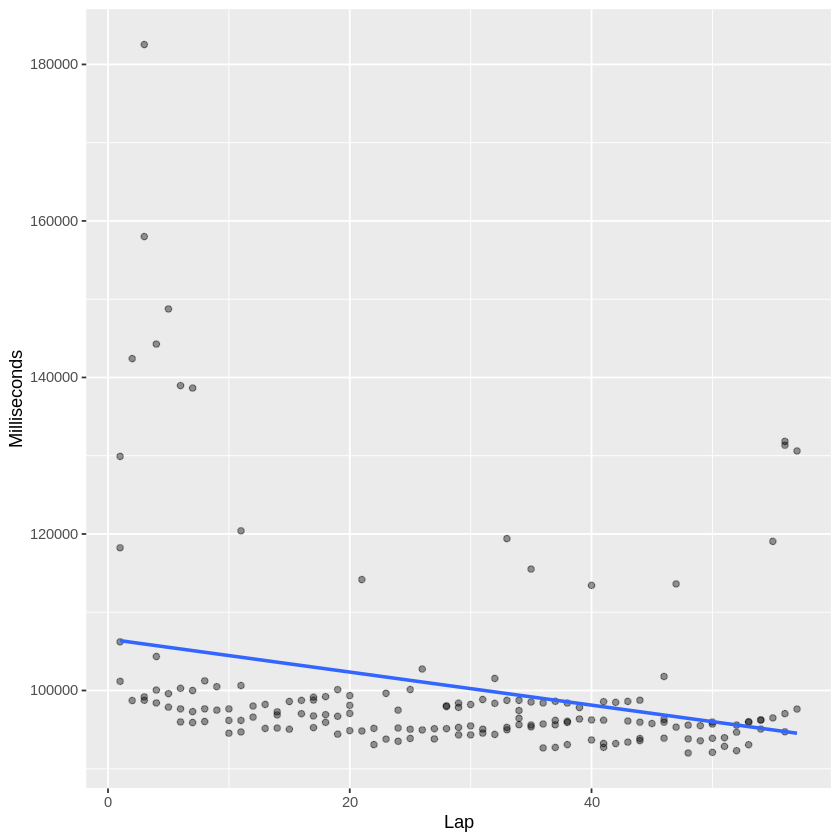

In [4]:
#1. Bahrain 

mv_bahrain <- ver_laps %>%
                filter(raceId %in% bahrain_race_ID) 

mv_bahrain_clean <- mv_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>% 
                        head(4)
mv_bahrain_clean
mv_bahrain_clean_ID <- mv_bahrain_clean %>%
                        pull(raceId)


 ### SPLITTING DATA

mv_bahrain_races <- ver_laps %>%
                    filter(raceId %in% mv_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(mv_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1072,50


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5322401,88.70669,1.478445


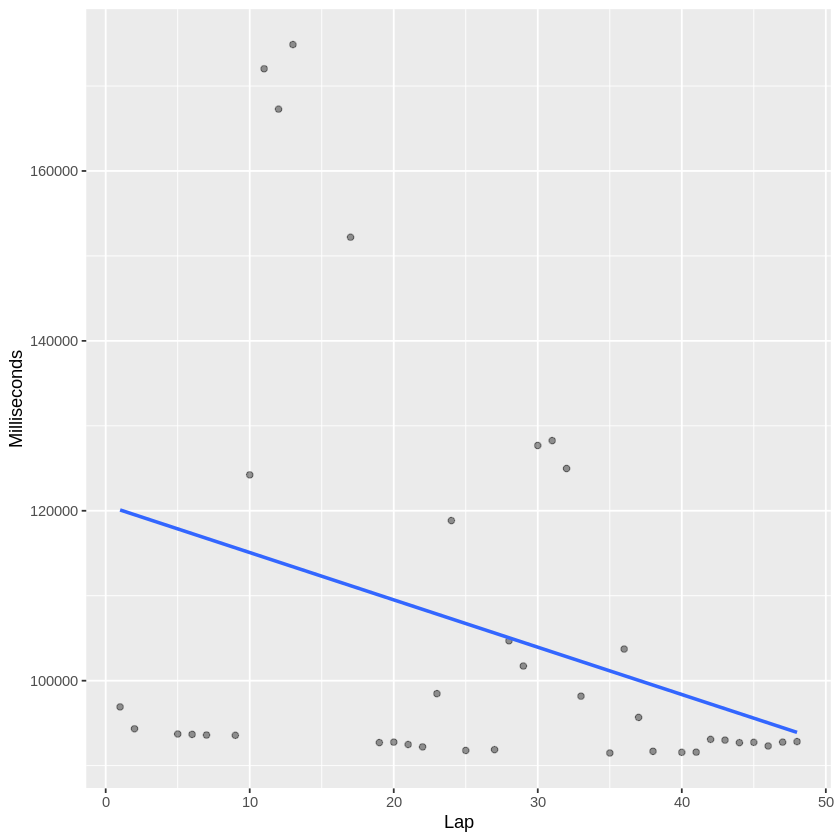

In [5]:
#2. Saudi Arabia 

mv_saudi <- ver_laps %>%
                filter(raceId %in% saudi_race_ID) 

mv_saudi_clean <- mv_saudi %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
mv_saudi_clean
mv_saudi_clean_ID <- mv_saudi_clean %>%
                        pull(raceId)

mv_saudi_races <- ver_laps %>%
                    filter(raceId %in% mv_saudi_clean_ID)

formulaone_split <- initial_split(mv_saudi_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_sa_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
989,58
1010,58
948,57
969,57


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5286556,88.10926,1.468488


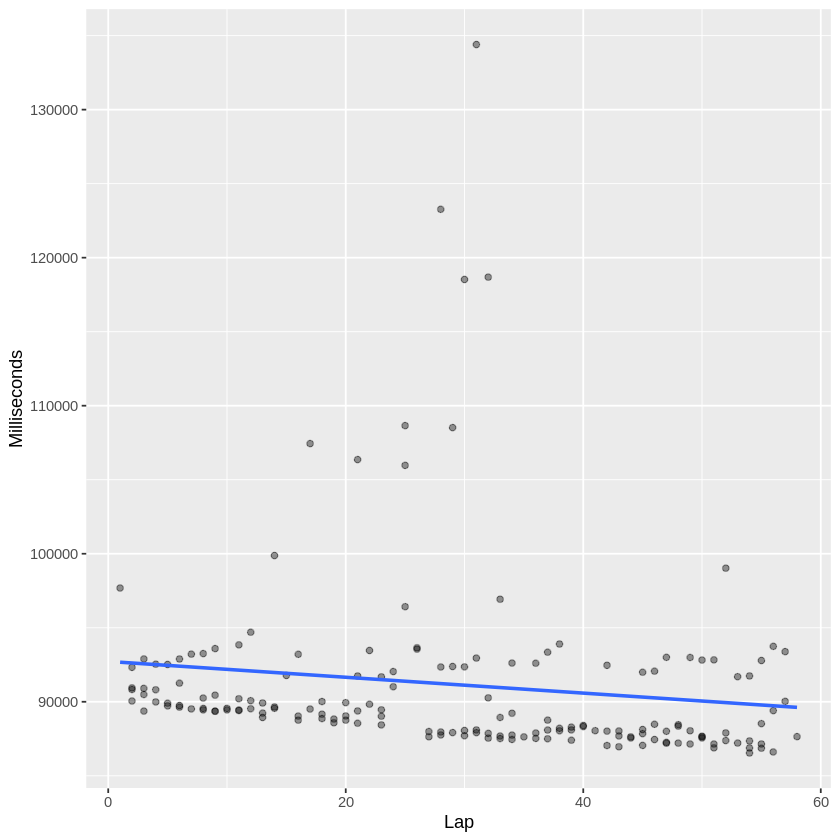

In [6]:
#3. Austrailia 

mv_aus <- ver_laps %>%
                filter(raceId %in% aus_race_ID) 

mv_aus_clean <- mv_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(4)
mv_aus_clean
mv_aus_clean_ID <- mv_aus_clean %>%
                        pull(raceId)

mv_aus_races <- ver_laps %>%
                    filter(raceId %in% mv_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(mv_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1053,63


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5739360,95.65601,1.594267


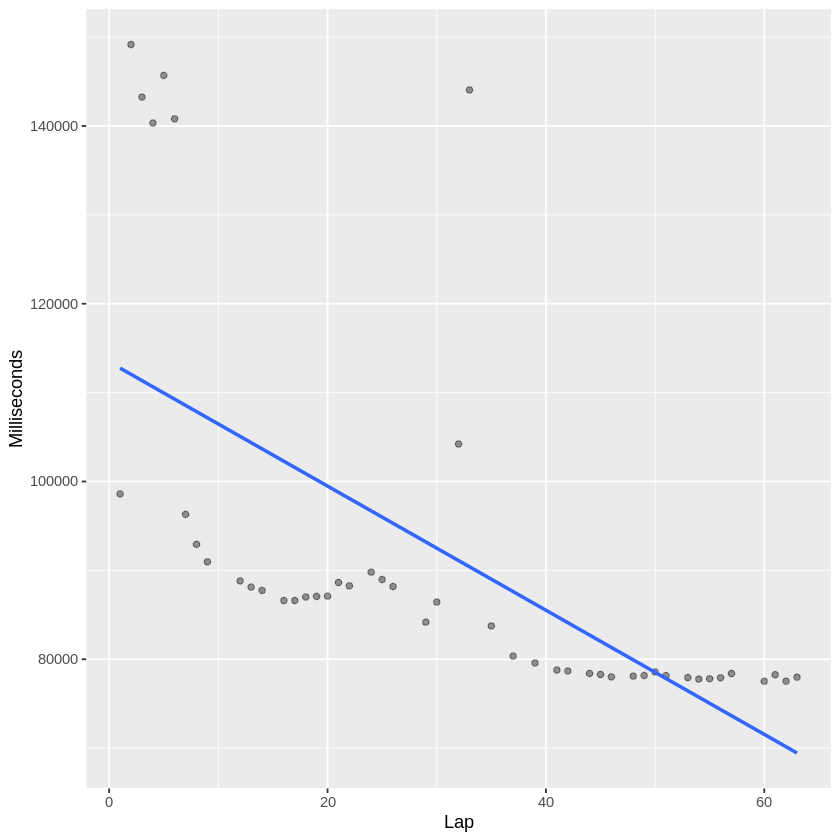

In [7]:
#4. Imola, Italy 

mv_imola <- ver_laps %>%
                filter(raceId %in% imola_race_ID) 

mv_imola_clean <- mv_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(1)
mv_imola_clean
mv_imola_clean_ID <- mv_imola_clean %>%
                        pull(raceId)

mv_imola_races <- ver_laps %>%
                    filter(raceId %in% mv_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(mv_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1044,58


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6098246,101.6374,1.693957


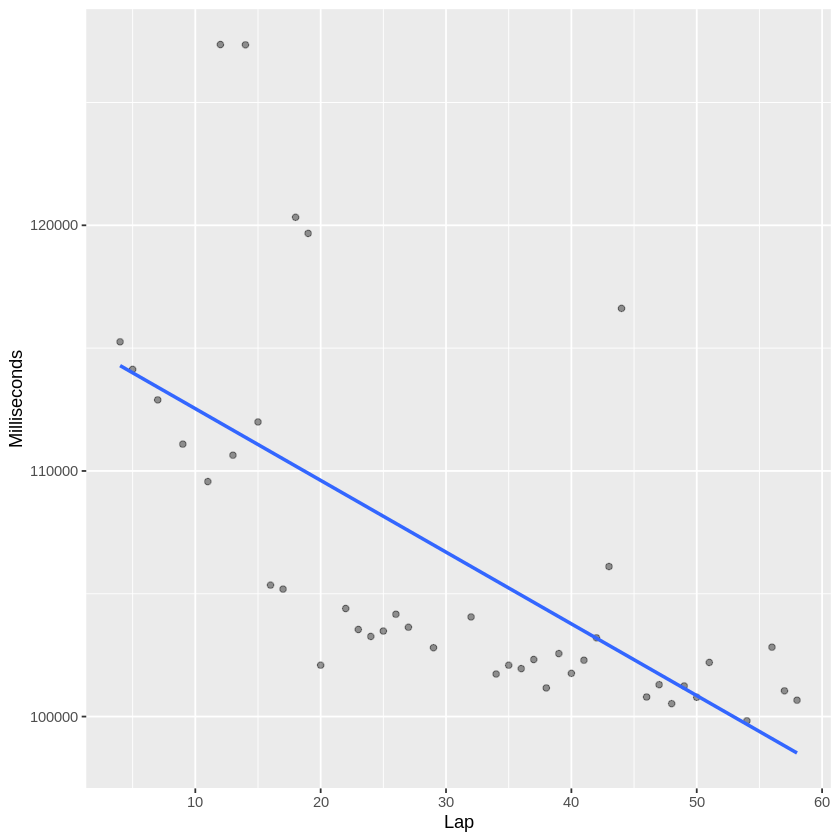

In [8]:
#5. Turkey (Replacing Miami)

mv_turkey <- ver_laps %>%
                filter(raceId %in% turkey_race_ID) 

mv_turkey_clean <- mv_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(1)
mv_turkey_clean
mv_turkey_clean_ID <- mv_turkey_clean %>%
                        pull(raceId)

mv_turkey_races <- ver_laps %>%
                    filter(raceId %in% mv_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(mv_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
952,66
993,66
1014,66
1036,66
1055,66
930,65


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5833774,97.22957,1.620493


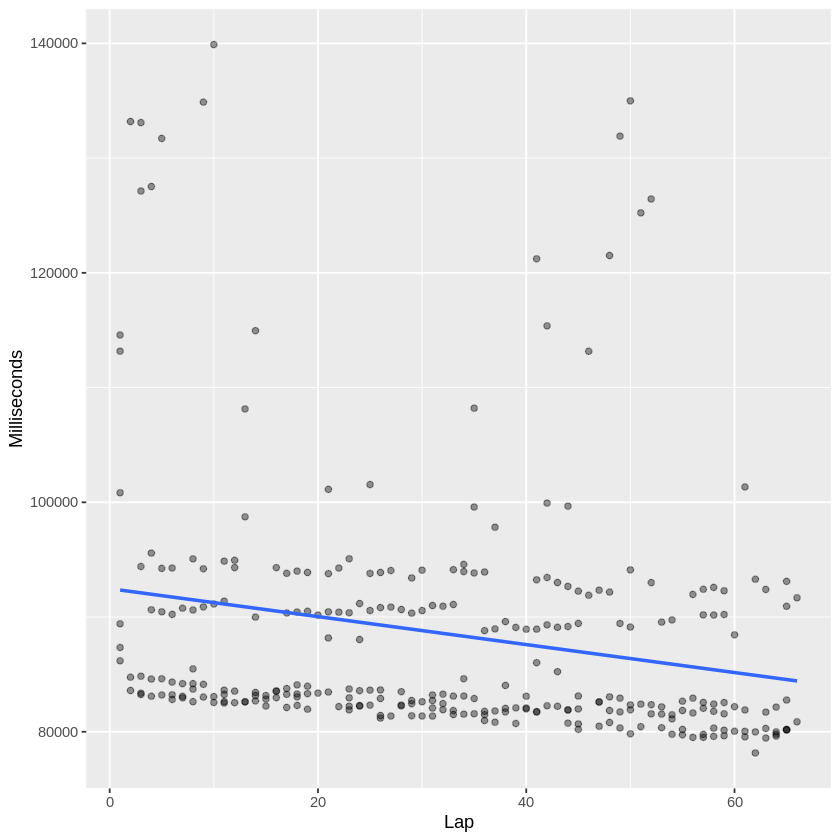

In [9]:
#6. Spain 

mv_spain <- ver_laps %>%
                filter(raceId %in% spain_race_ID) 

mv_spain_clean <- mv_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(6)
mv_spain_clean
mv_spain_clean_ID <- mv_spain_clean %>%
                        pull(raceId) 

mv_spain_races <- ver_laps %>%
                    filter(raceId %in% mv_spain_clean_ID)

formulaone_split <- initial_split(mv_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
974,78
994,78
1015,78
1056,78


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6163181,102.7197,1.711995


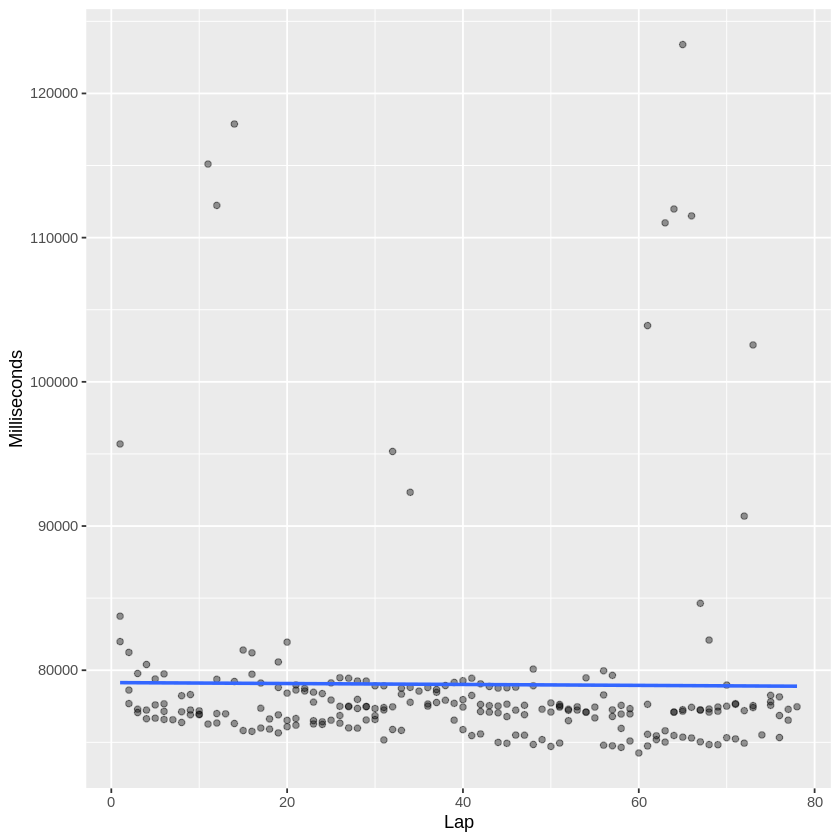

In [10]:
#7. Monaco 

mv_monaco <- ver_laps %>%
                filter(raceId %in% monaco_race_ID) 

mv_monaco_clean <- mv_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%  
                        head(4)
mv_monaco_clean
mv_monaco_clean_ID <- mv_monaco_clean %>%
                        pull(raceId)

mv_monaco_races <- ver_laps %>%
                    filter(raceId %in% mv_monaco_clean_ID)

formulaone_split <- initial_split(mv_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
955,51
1013,51


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5610097,93.50162,1.55836


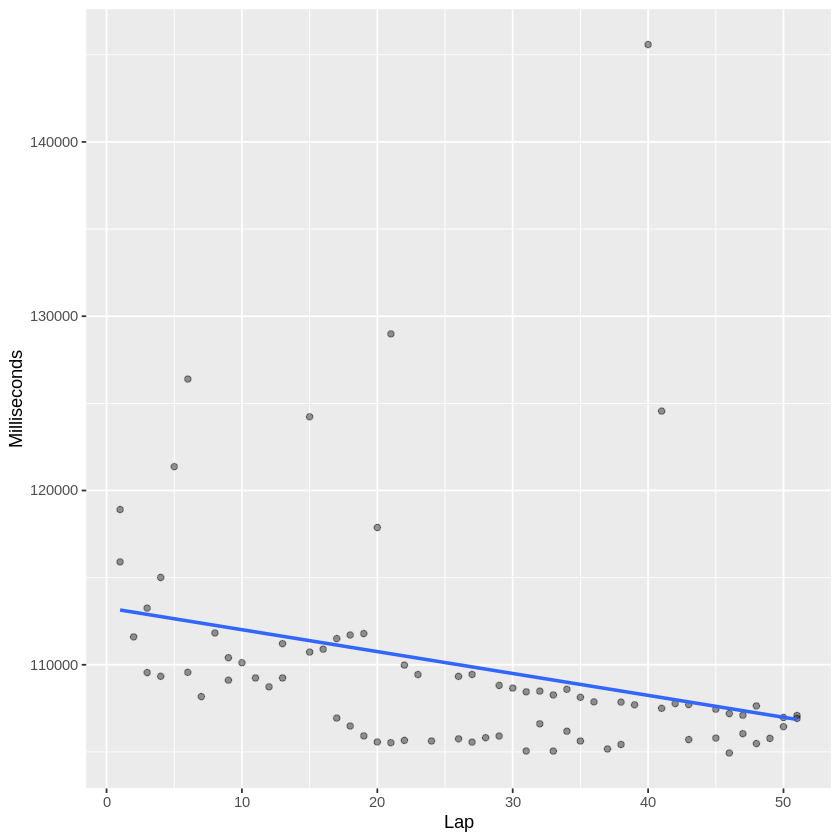

In [11]:
#8. Azerbaijan 

mv_azerbaijan <- ver_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

mv_azerbaijan_clean <- mv_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(2)
mv_azerbaijan_clean
mv_azerbaijan_clean_ID <- mv_azerbaijan_clean %>%
                        pull(raceId)

mv_azerbaijan_races <- ver_laps %>%
                    filter(raceId %in% mv_azerbaijan_clean_ID)

formulaone_split <- initial_split(mv_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
954,70
1016,70
932,69
995,68


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5491471,91.52451,1.525409


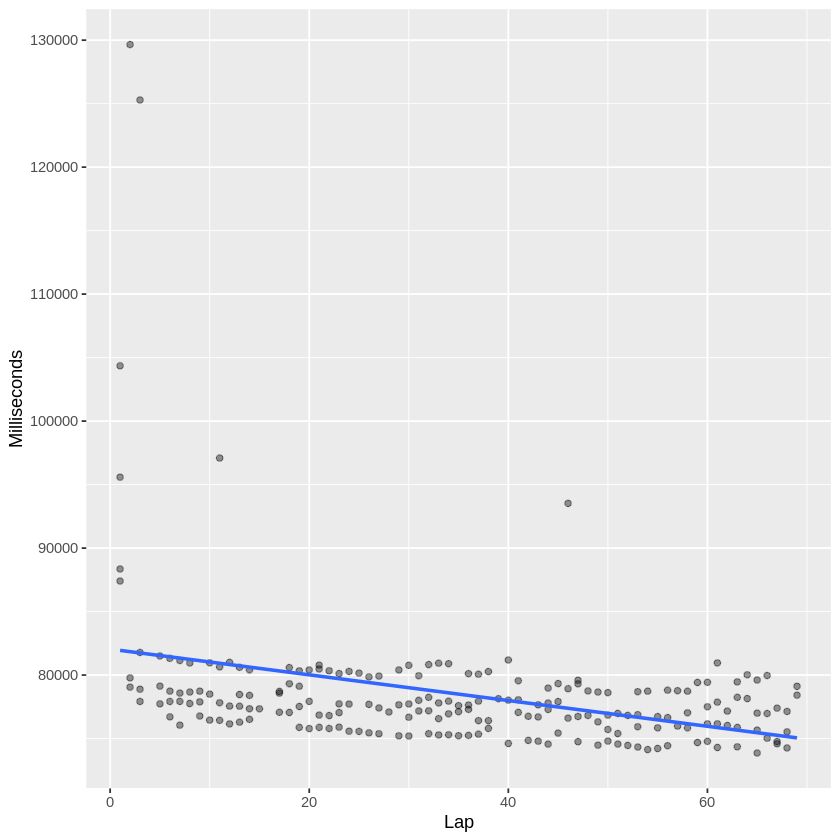

In [12]:
#9. Canada 

mv_canada <- ver_laps %>%
                filter(raceId %in% canada_race_ID) 

mv_canada_clean <- mv_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(4)
mv_canada_clean
mv_canada_clean_ID <- mv_canada_clean %>%
                        pull(raceId)

mv_canada_races <- ver_laps %>%
                    filter(raceId %in% mv_canada_clean_ID)

formulaone_split <- initial_split(mv_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
957,52
1019,52
1034,52
1035,52
978,51


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5125741,85.42902,1.423817


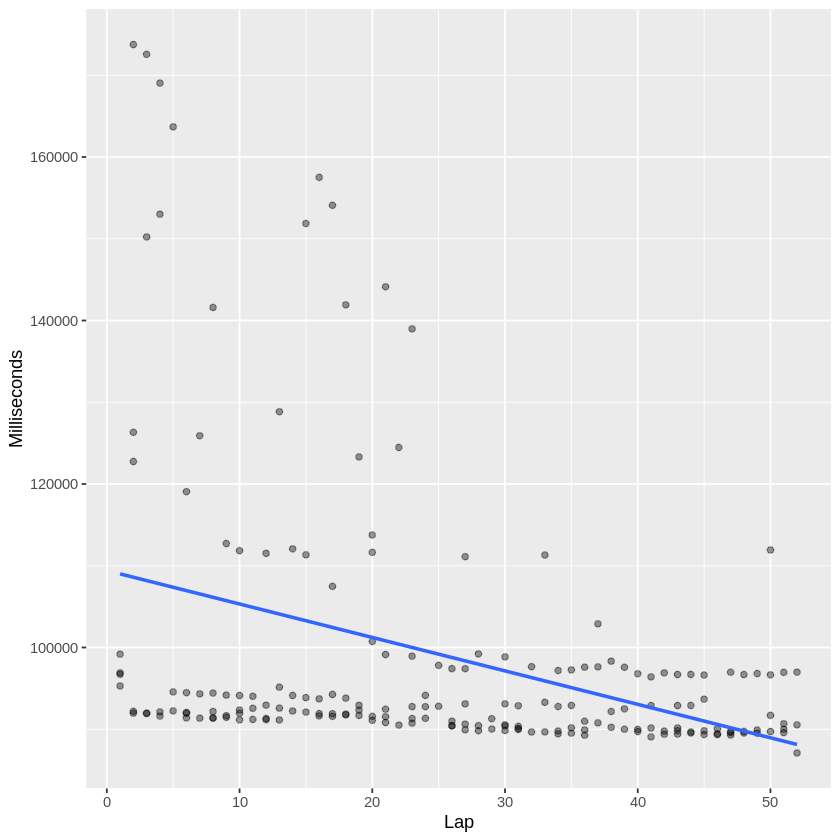

In [13]:
#10. Great Britain 

mv_uk <- ver_laps %>%
                filter(raceId %in% uk_race_ID) 

mv_uk_clean <- mv_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(5)
mv_uk_clean
mv_uk_clean_ID <- mv_uk_clean %>%
                        pull(raceId)

mv_uk_races <- ver_laps %>%
                    filter(raceId %in% mv_uk_clean_ID)

formulaone_split <- initial_split(mv_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
956,71
997,71
1018,71
1032,71
1058,71
1060,71
933,70


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5070542,84.50903,1.408484


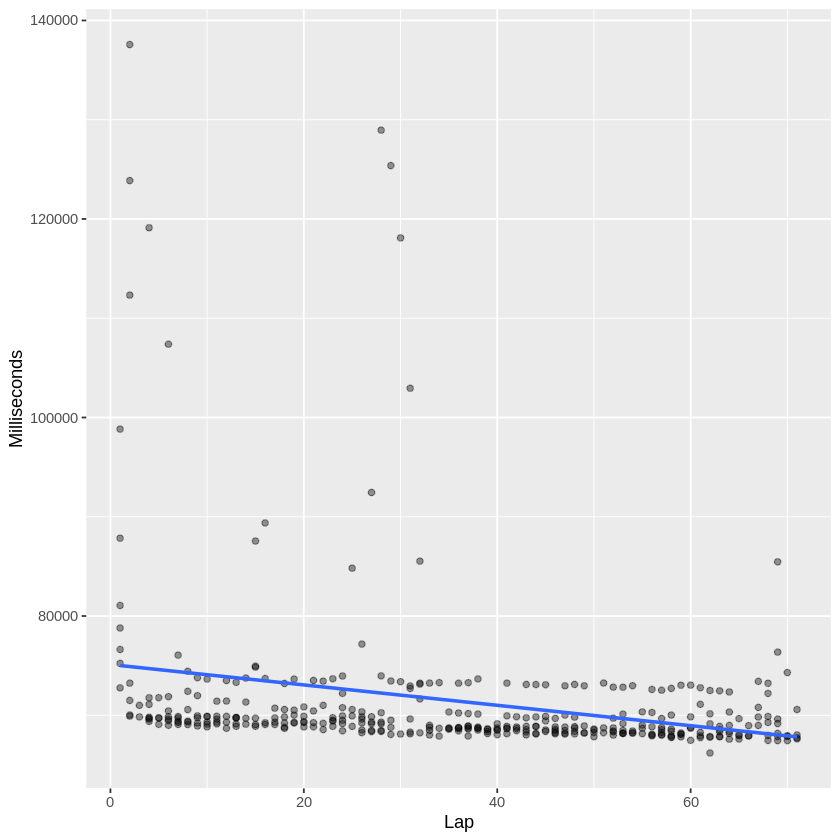

In [14]:
#11. Austria 

mv_austria <- ver_laps %>%
                filter(raceId %in% austria_race_ID) 

mv_austria_clean <- mv_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(7)
mv_austria_clean
mv_austria_clean_ID <- mv_austria_clean %>%
                        pull(raceId)

mv_austria_races <- ver_laps %>%
                    filter(raceId %in% mv_austria_clean_ID)

formulaone_split <- initial_split(mv_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austria_prediction()

In [15]:
# #12. France 

# mv_france <- ver_laps %>%
#                 filter(raceId %in% france_race_ID) 

# mv_france_clean <- mv_france %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# mv_france_clean
# mv_france_clean_ID <- mv_france_clean %>%
#                         pull(raceId)

# mv_france_races <- ver_laps %>%
#                     filter(raceId %in% mv_france_clean_ID)

# formulaone_split <- initial_split(mv_france_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

# ### GETS PREDICTION

# get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
958,70
979,70
1021,70
1033,70
1062,70
936,69


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6029284,100.4881,1.674801


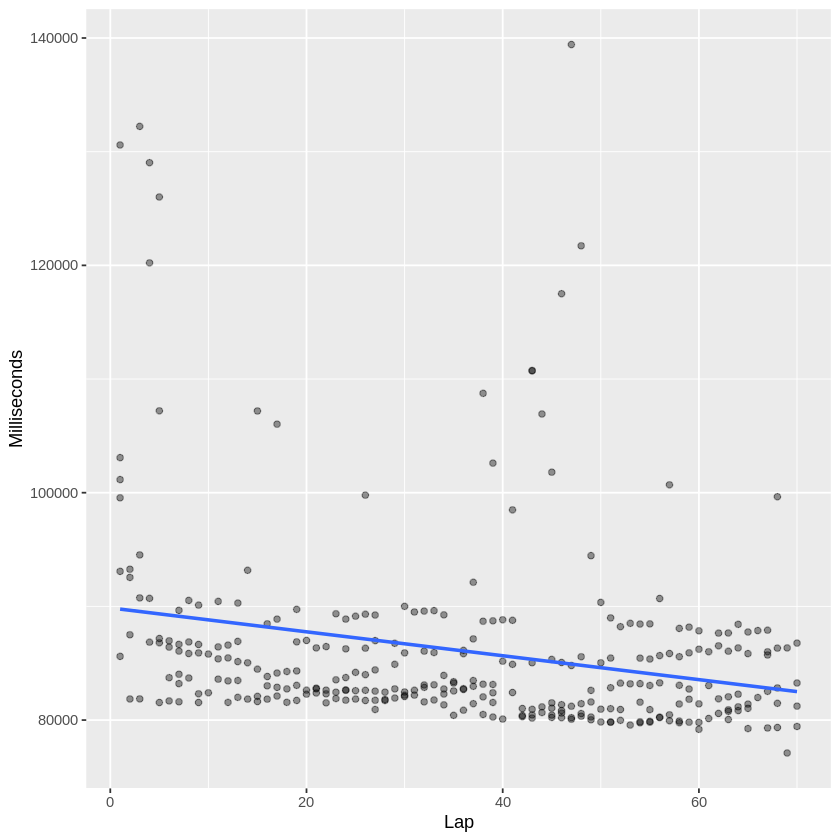

In [16]:
#13. Hungary 

mv_hungary <- ver_laps %>%
                filter(raceId %in% hungary_race_ID) 

mv_hungary_clean <- mv_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(6)
mv_hungary_clean
mv_hungary_clean_ID <- mv_hungary_clean %>%
                        pull(raceId)

mv_hungary_races <- ver_laps %>%
                    filter(raceId %in% mv_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(mv_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
960,44
1001,44
1037,44
937,43


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5160839,86.01399,1.433566


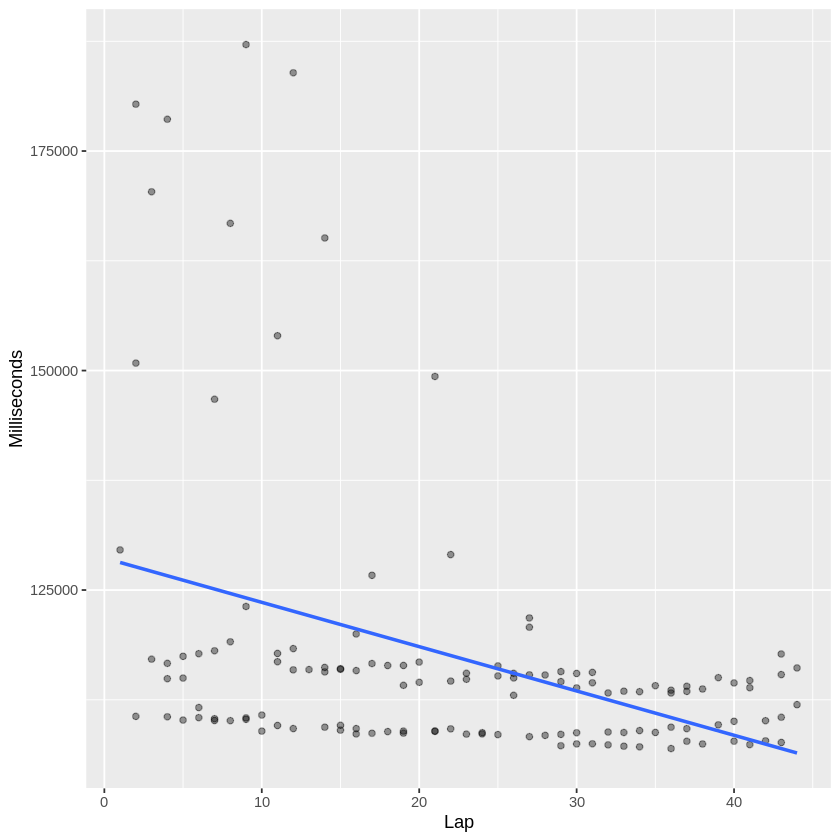

In [17]:
#14. Belgium 

mv_belgium <- ver_laps %>%
                filter(raceId %in% belgium_race_ID) 

mv_belgium_clean <- mv_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(4)
mv_belgium_clean
mv_belgium_clean_ID <- mv_belgium_clean %>%
                        pull(raceId)

mv_belgium_races <- ver_laps %>%
                    filter(raceId %in% mv_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(mv_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,72


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5377410,89.6235,1.493725


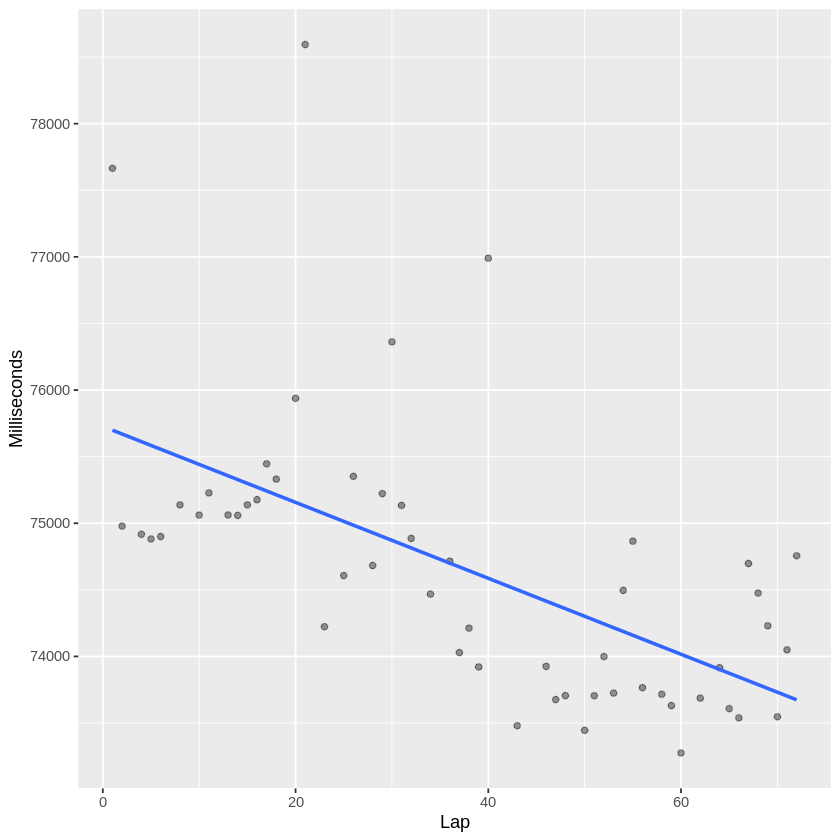

In [18]:
#15. Netherlands 

mv_netherlands <- ver_laps %>%
                filter(raceId %in% netherlands_race_ID) 

mv_netherlands_clean <- mv_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
mv_netherlands_clean
mv_netherlands_clean_ID <- mv_netherlands_clean %>%
                        pull(raceId)

mv_netherlands_races <- ver_laps %>%
                    filter(raceId %in% mv_netherlands_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(mv_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
961,53
1002,53
1023,53
938,52
981,52


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4666532,77.77553,1.296259


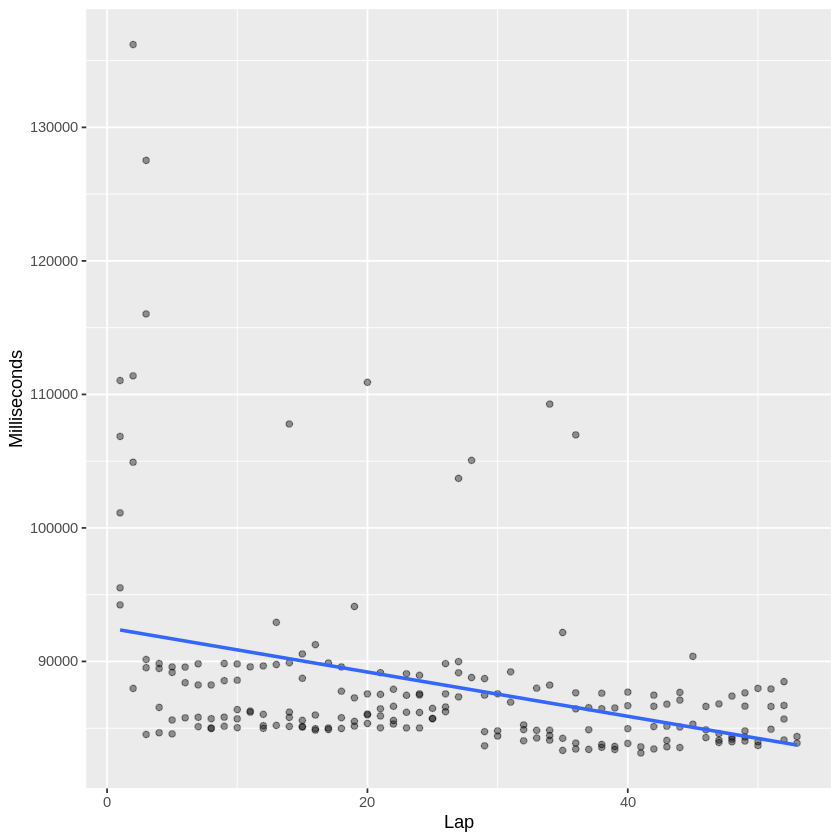

In [19]:
#16. Monza, Italy 

mv_monza <- ver_laps %>%
                filter(raceId %in% monza_race_ID) 

mv_monza_clean <- mv_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(5)
mv_monza_clean
mv_monza_clean_ID <- mv_monza_clean %>%
                        pull(raceId)

mv_monza_races <- ver_laps %>%
                    filter(raceId %in% mv_monza_clean_ID)

formulaone_split <- initial_split(mv_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
939,61
962,61
1003,61
1024,61


`geom_smooth()` using formula 'y ~ x'



ERROR: Error in get_singpore_prediction(): could not find function "get_singpore_prediction"


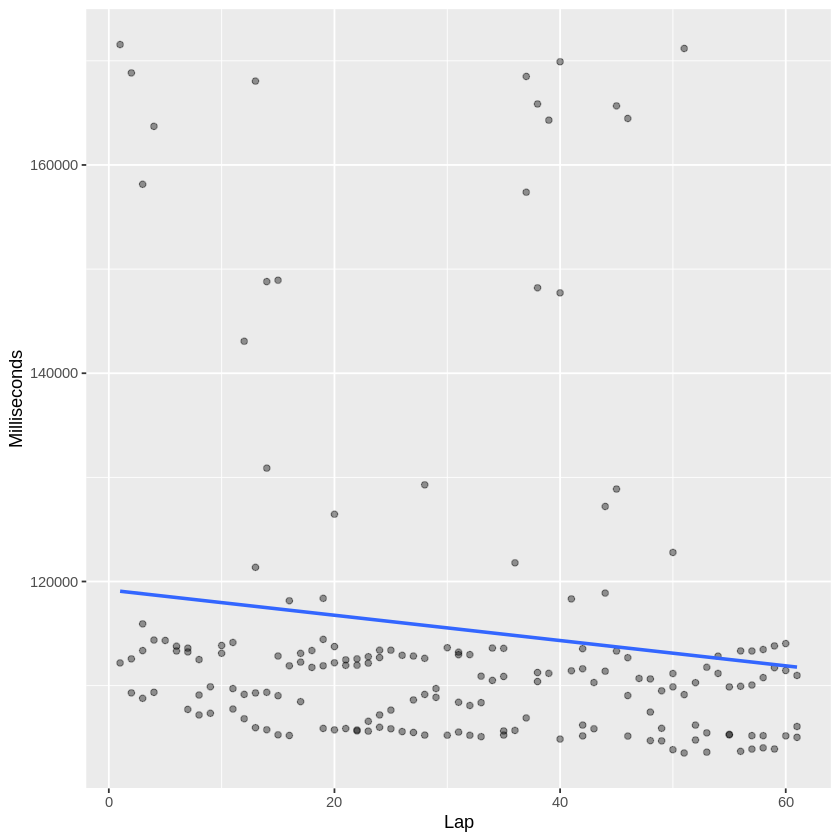

In [21]:
#17. Singapore 

mv_singapore <- ver_laps %>%
                filter(raceId %in% singapore_race_ID) 

mv_singapore_clean <- mv_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
mv_singapore_clean
mv_singapore_clean_ID <- mv_singapore_clean %>%
                        pull(raceId)

mv_singapore_races <- ver_laps %>%
                    filter(raceId %in% mv_singapore_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(mv_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_singpore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
940,53
964,53
984,53
1005,53


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5275610,87.92683,1.465447


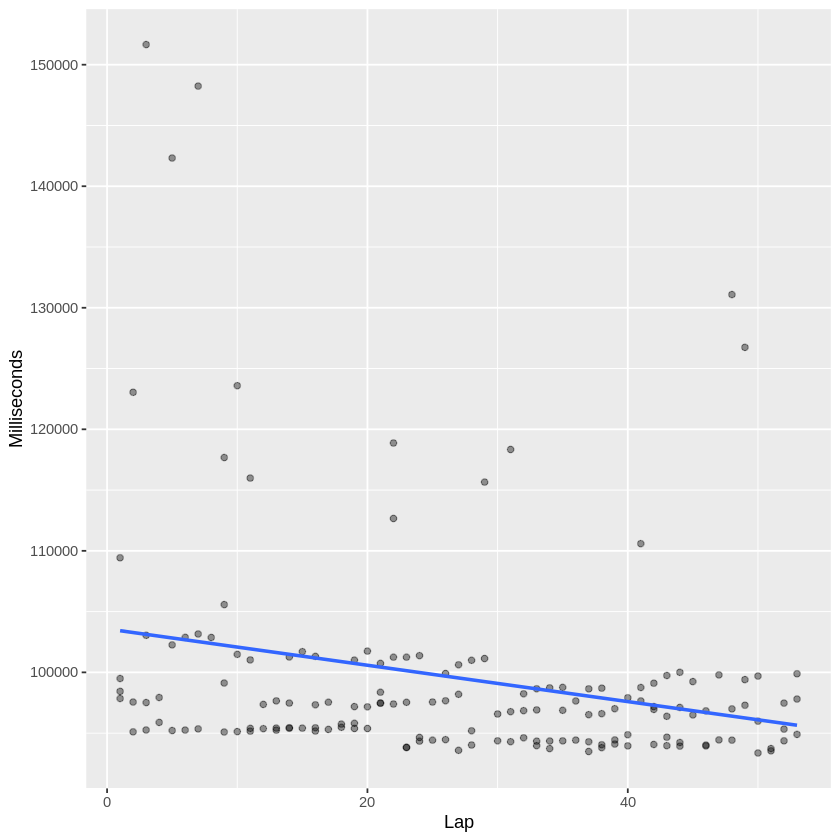

In [22]:
#18. Japan 

mv_japan <- ver_laps %>%
                filter(raceId %in% japan_race_ID) 

mv_japan_clean <- mv_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        head(4)
mv_japan_clean
mv_japan_clean_ID <- mv_japan_clean %>%
                        pull(raceId)

mv_japan_races <- ver_laps %>%
                    filter(raceId %in% mv_japan_clean_ID)

formulaone_split <- initial_split(mv_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
942,56
985,56
1006,56
1028,56
1069,56


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5864143,97.73572,1.628929


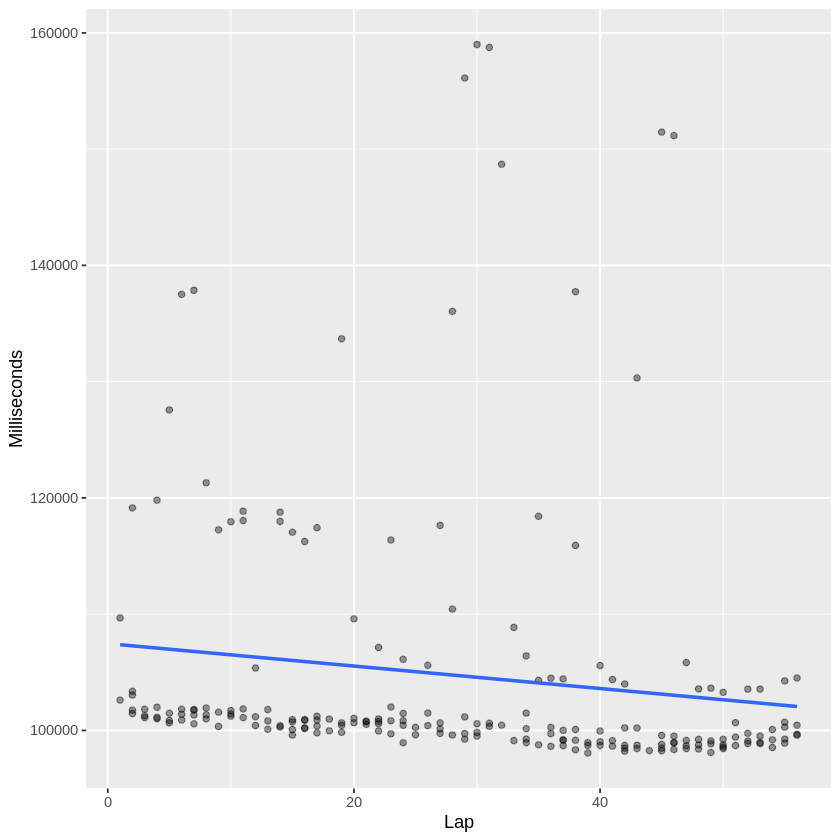

In [23]:
#19. Austin, USA

mv_austin <- ver_laps %>%
                filter(raceId %in% austin_race_ID) 

mv_austin_clean <- mv_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))  %>%
                        head(5)
mv_austin_clean
mv_austin_clean_ID <- mv_austin_clean %>%
                        pull(raceId)

mv_austin_races <- ver_laps %>%
                    filter(raceId %in% mv_austin_clean_ID)

formulaone_split <- initial_split(mv_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
943,71
966,71
986,71
1007,71
1027,71
1070,71


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5930704,98.84507,1.647418


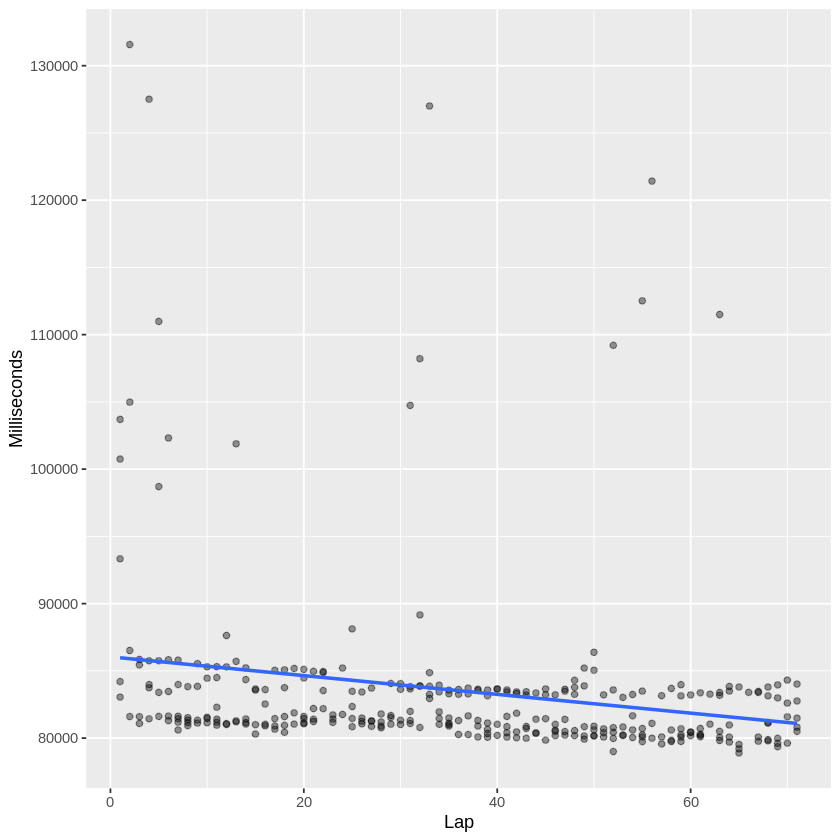

In [24]:
#20. Mexico 

mv_mexico <- ver_laps %>%
                filter(raceId %in% mexico_race_ID) 

mv_mexico_clean <- mv_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
mv_mexico_clean
mv_mexico_clean_ID <- mv_mexico_clean %>%
                        pull(raceId)

mv_mexico_races <- ver_laps %>%
                    filter(raceId %in% mv_mexico_clean_ID)

formulaone_split <- initial_split(mv_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
967,71
987,71
1008,71
1029,71
1071,71
944,70


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5785899,96.43166,1.607194


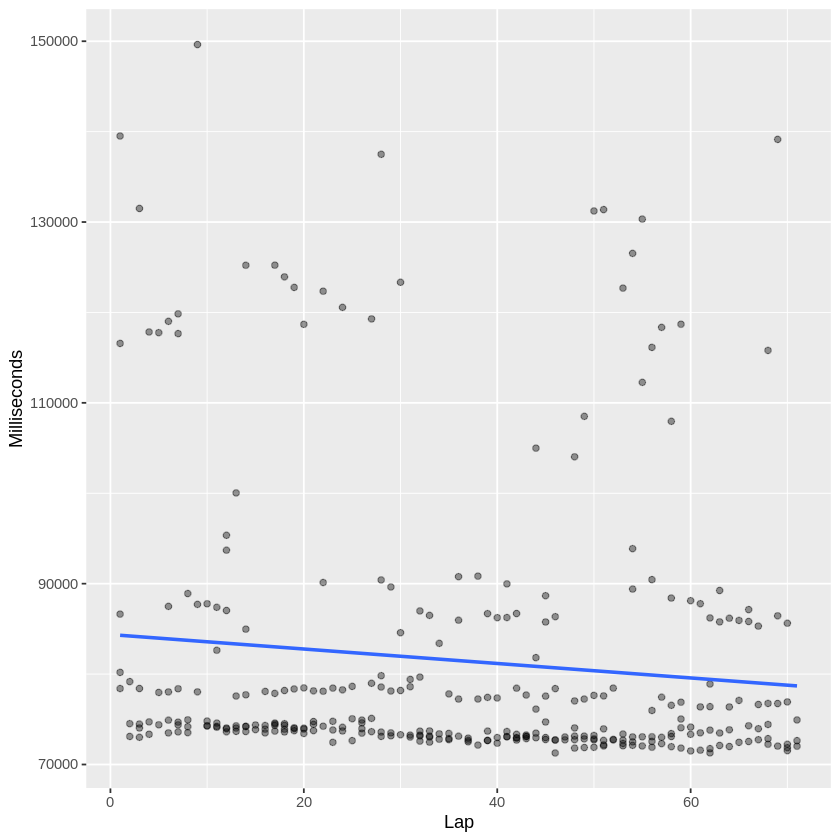

In [25]:
#21. Brazil 

mv_brazil <- ver_laps %>%
                filter(raceId %in% brazil_race_ID) 

mv_brazil_clean <- mv_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
mv_brazil_clean
mv_brazil_clean_ID <- mv_brazil_clean %>%
                        pull(raceId)

mv_brazil_races <- ver_laps %>%
                    filter(raceId %in% mv_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(mv_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
968,55
988,55
1009,55
1030,55
1047,55


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6107877,101.7979,1.696632


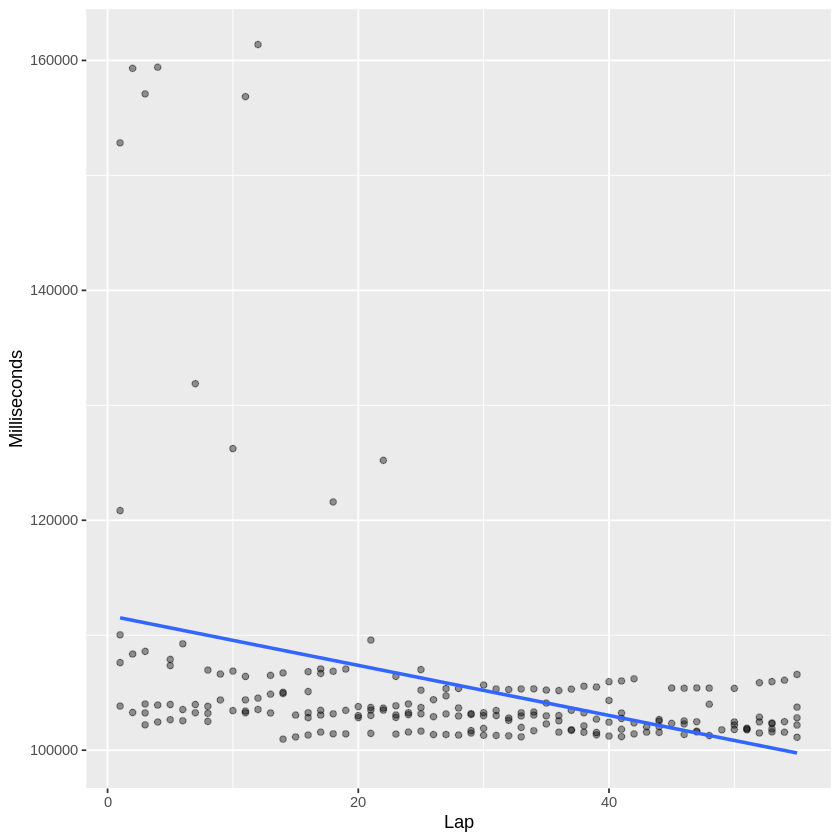

In [26]:
#22. Abu Dhabi 

mv_uae <- ver_laps %>%
                filter(raceId %in% uae_race_ID) 

mv_uae_clean <- mv_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n == 55)
mv_uae_clean
mv_uae_clean_ID <- mv_uae_clean %>%
                        pull(raceId)

mv_uae_races <- ver_laps %>%
                    filter(raceId %in% mv_uae_clean_ID)

formulaone_split <- initial_split(mv_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uae_prediction()